In [32]:
import pandas as pd 
import numpy as np 
import yfinance as yf
from datetime import datetime

In [33]:
# get the stock data
df = yf.download('ANHYT.IS', start='2000-01-01', end=datetime.now())

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ANHYT.IS,ANHYT.IS,ANHYT.IS,ANHYT.IS,ANHYT.IS
Date,,,,,
2000-05-10,5.386124,5.565662,5.116818,5.386124,115718
2000-05-11,5.386124,5.386124,5.027049,5.386124,53148
2000-05-12,5.206588,5.386125,5.206588,5.206588,28085
2000-05-15,5.206588,5.206588,5.206588,5.206588,0
2000-05-16,5.027049,5.206587,4.937281,5.027049,29195


In [34]:
# Create a new dataframe with only the 'Close column 
data = df[['Close']]
# Convert the dataframe to a numpy array

dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

6087

In [35]:
from sklearn.preprocessing import MinMaxScaler
#scaled data 0 to 1 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04008398],
       [0.04008398],
       [0.0387333 ],
       ...,
       [0.74349596],
       [0.70824225],
       [0.69056291]])

In [36]:

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04008398, 0.04008398, 0.0387333 , 0.0387333 , 0.03738261,
       0.03670727, 0.03468124, 0.03468124, 0.03670727, 0.03670727,
       0.03670727, 0.03670727, 0.04075932, 0.04075932, 0.04075932,
       0.04075932, 0.04075932, 0.04008398, 0.04008398, 0.04008398,
       0.04008398, 0.04008398, 0.04075932, 0.03940864, 0.03805795,
       0.03805795, 0.03535659, 0.0340059 , 0.0340059 , 0.03468124,
       0.03468124, 0.0340059 , 0.0340059 , 0.0340059 , 0.03265521,
       0.03265521, 0.03299289, 0.0316422 , 0.03265521, 0.03299289,
       0.03231755, 0.03299289, 0.03197988, 0.03197988, 0.03197988,
       0.03130454, 0.03096686, 0.02961618, 0.02894084, 0.02860317,
       0.02860317, 0.02894084, 0.02995384, 0.03029152, 0.02995384,
       0.03130454, 0.03197988, 0.03130454, 0.03062919, 0.03062919])]
[0.030629191094331494]

[array([0.04008398, 0.04008398, 0.0387333 , 0.0387333 , 0.03738261,
       0.03670727, 0.03468124, 0.03468124, 0.03670727, 0.03670727,
       0.03670727, 0.03670727, 0.0

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 94s 15ms/step - loss: 2.1350e-04


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


7.706461934066894

C:\Users\abdul\AppData\Local\Temp\ipykernel_19708\946905915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


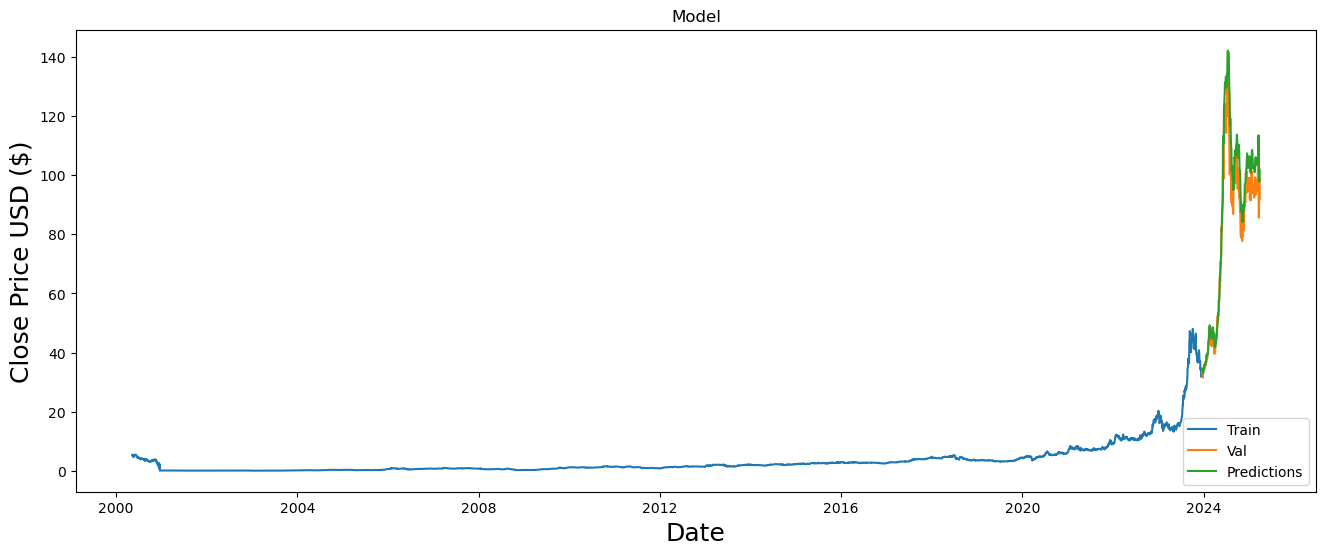

In [39]:
# Plot the data
import matplotlib.pyplot as plt
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
test = yf.download('ANHYT.IS', start='2025-01-03', end=datetime.now())


test.shape

[*********************100%***********************]  1 of 1 completed


(60, 5)

In [50]:
testdata = test[['Close']]
# Convert the dataframe to a numpy array

In [53]:
testdata.shape

(60, 1)

In [54]:


testdata1 = testdata.values

scaled_test_data = scaler.fit_transform(testdata1)
test1 = np.reshape(scaled_test_data, (scaled_test_data.shape[0], scaled_test_data.shape[1], 1))
testarray = []
testarray.append(test1)
testarray=np.array(testarray)
testarray = np.reshape(testarray, (testarray.shape[0], testarray.shape[1], 1))
test_predictions = model.predict(testarray)
test_predictions = scaler.inverse_transform(test_predictions)
print(f"Modelin Tahmin Ettiği Fiyat: {test_predictions[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Modelin Tahmin Ettiği Fiyat: 94.46461486816406
